In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [2]:
(X_train , y_train) , (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape


(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

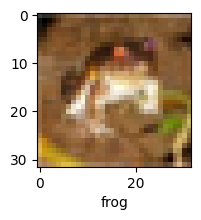

In [15]:
plot_sample(X_train , y_train , 0)

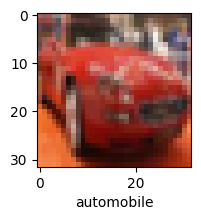

In [16]:
plot_sample(X_train , y_train , 5)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)) , 
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train , y_train , epochs=5)

G:\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.3035 - loss: 1.9310
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4194 - loss: 1.6427
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.4491 - loss: 1.5586
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4819 - loss: 1.4849
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4951 - loss: 1.4306


In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)) ,

    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [24]:
cnn.compile(
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.3710 - loss: 1.7301
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5660 - loss: 1.2200
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6290 - loss: 1.0600
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6591 - loss: 0.9749
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6808 - loss: 0.9090
